In [ ]:
!pip install networkx
!pip install pandas
!pip install --upgrade graphrole
!pip uninstall numpy -y
!pip install numpy

import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.cm as cm
from graphrole import RecursiveFeatureExtractor, RoleExtractor


  Using cached numpy-1.24.2-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.3 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.25.1
    Uninstalling numpy-1.25.1:
      Successfully uninstalled numpy-1.25.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.24.2 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.24.2 which is incompatible.


Found existing installation: numpy 1.24.2
Uninstalling numpy-1.24.2:
  Successfully uninstalled numpy-1.24.2
  Using cached numpy-1.25.1-cp310-cp310-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (17.6 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
graphrole 1.1.0 requires numpy==1.24.2, but you have numpy 1.25.1 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.1 which is incompatible.
tensorflow 2.12.0 requires numpy<1.24,>=1.22, but you have numpy 1.25.1 which is incompatible.


In [ ]:
viajes = pd.read_csv("viajes.csv")

In [ ]:
viajes.head(5)

,inicio,fin,cantidad_viajes
0,709 West 6th Street,221 East 9th Street,6364
1,2505 Longview Street,221 East 9th Street,6147
2,221 East 9th Street,2505 Longview Street,5517
3,221 East 9th Street,3600 Presidential Boulevard,5335
4,221 East 9th Street,2605 Whitis Avenue,5283


In [ ]:
grafo = nx.Graph()
for idx, fila in viajes.iterrows():
    grafo.add_edge(fila['inicio'], fila['fin'], weight=fila['cantidad_viajes'])

In [ ]:
def extract_roles_and_plot(G, title='',save = False ,file_name='', big=False):
  feature_extractor = RecursiveFeatureExtractor(G)
  features = feature_extractor.extract_features()
  role_extractor = RoleExtractor(n_roles=None)
  role_extractor.extract_role_factors(features)
  labels = {node: node for node in G.nodes()}

  available_colors = {'role_0':'#E9D758', 'role_1':'#297373', 'role_2':'#ff8552', \
                      'role_3':'#888888', 'role_4':'#00aa00','role_5':'#aaaa00',\
                      'role_6':'#aa0000' , 'role_7':'#0000aa'}

  colors = [available_colors[role_extractor.roles[node]] for node in G.nodes()]

  pos = nx.kamada_kawai_layout(G)
  if big:
    plt.figure(figsize=(25,25))
  else:
    plt.figure(figsize=(20,20))
  plt.title(title)

  nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, alpha=0.7,node_size=200, linewidths=2)
  nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.05)
  nx.draw_networkx_labels(G, pos, labels=labels)

  if save:
    plt.savefig(file_name, format = 'svg', dpi=300)
    plt.figure(figsize=(10,10))
  plt.title(title)

  nx.draw_networkx_nodes(G, pos, nodelist=G.nodes(), node_color=colors, alpha=0.7,node_size=200, linewidths=2)
  nx.draw_networkx_edges(G, pos, width=0.3, alpha=0.5)
  nx.draw_networkx_labels(G, pos, labels=labels)

  if save:
    plt.savefig(file_name, format = 'svg', dpi=300)

Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f4392894d30>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 847, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 984, in _make_controller_from_path
    lib_controller = controller_class(filepath=filepath, prefix=prefix)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 111, in __init__
    self.dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


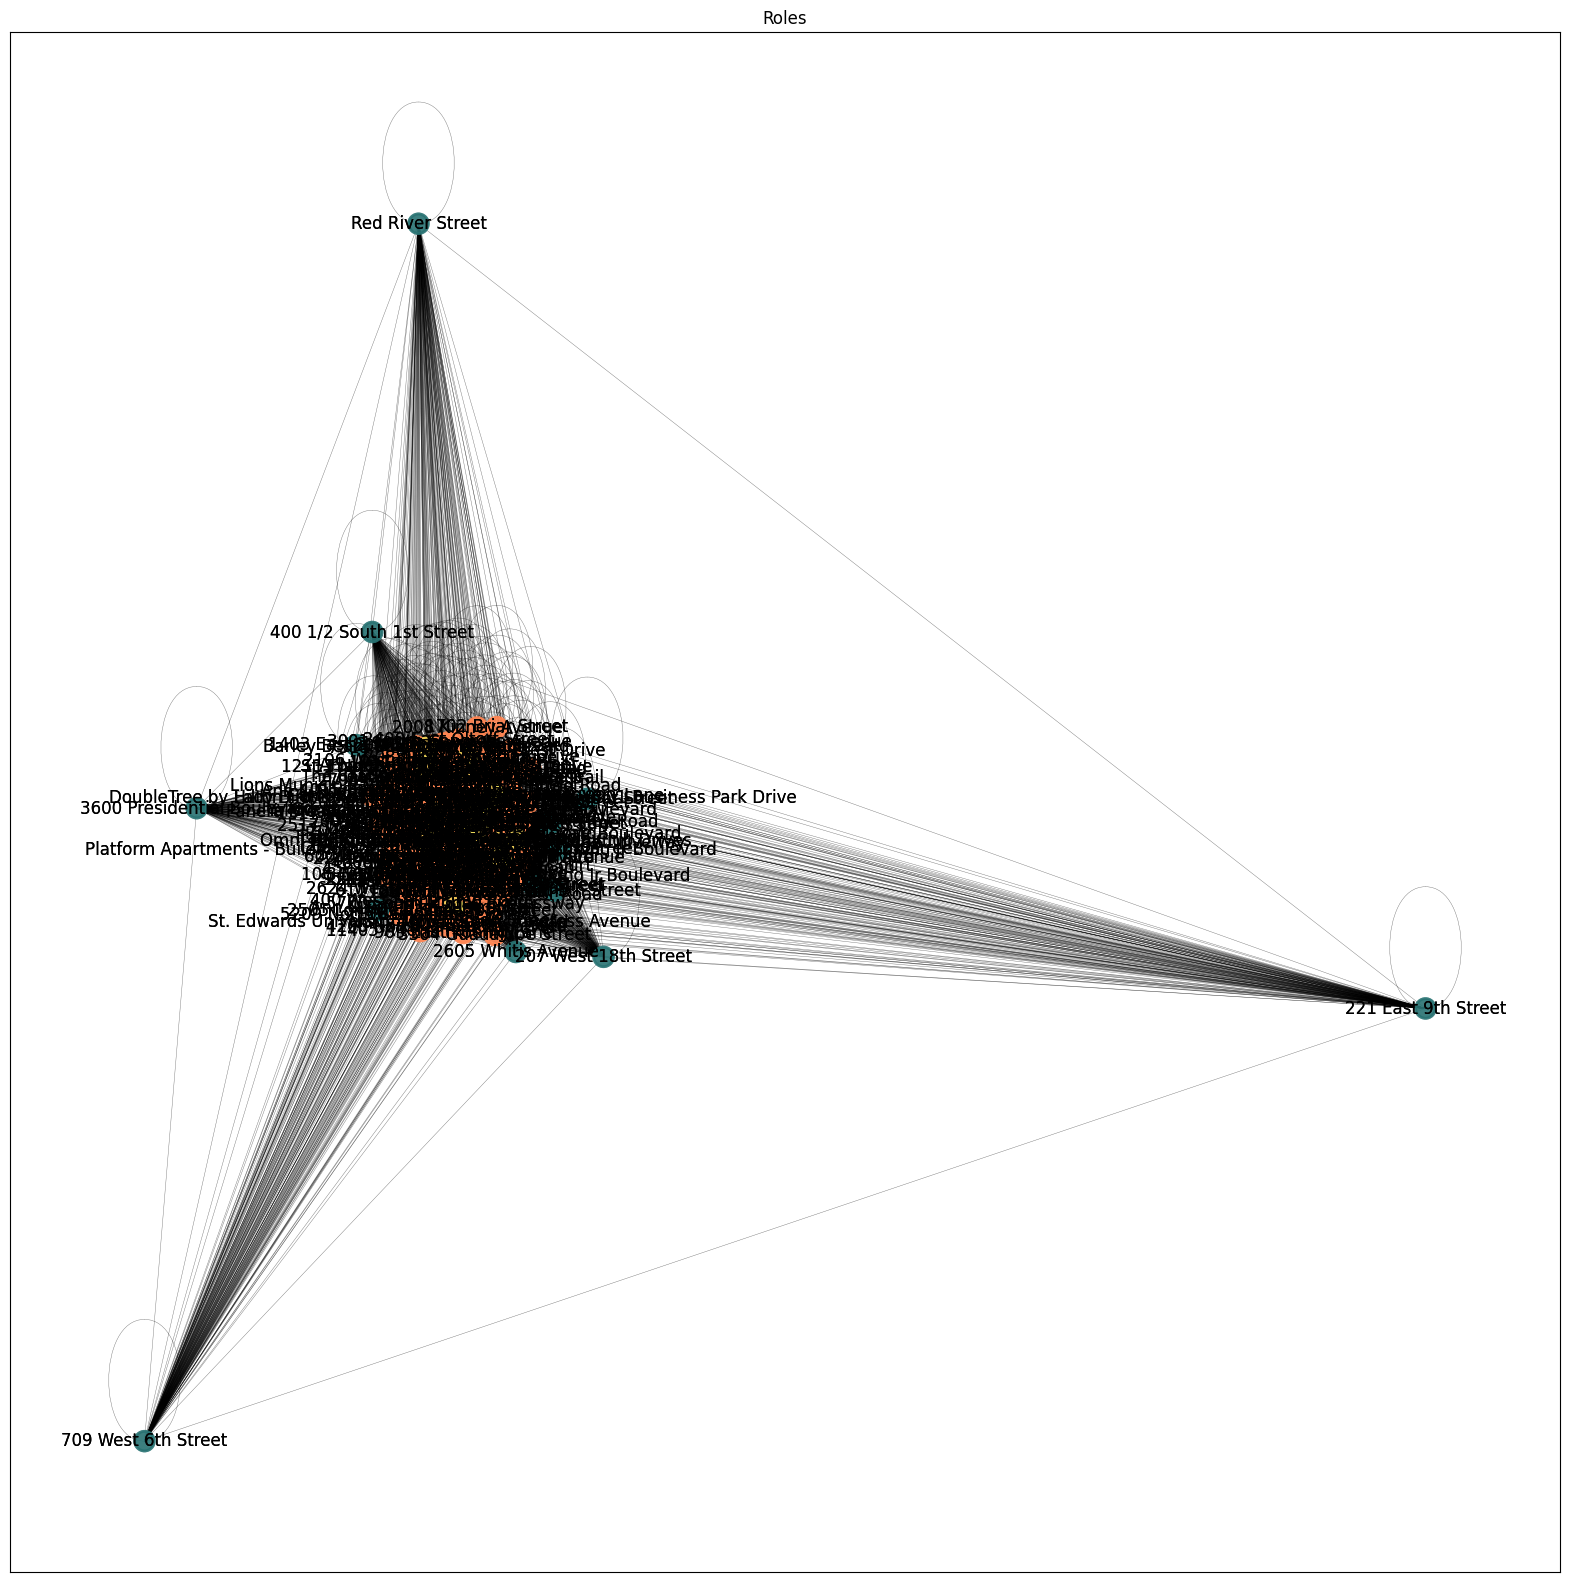

In [ ]:
extract_roles_and_plot(grafo, title='Roles', save=False, file_name='img/roles_ep4.svg')

In [ ]:
feature_extractor = RecursiveFeatureExtractor(grafo)
features = feature_extractor.extract_features()
role_extractor = RoleExtractor(n_roles=None)
role_extractor.extract_role_factors(features)

In [ ]:
ubicaciones_por_roles = [[], [], []]

for i in range(0,3):
  for key, value in role_extractor.roles.items():
    if i == int(value[len(value)-1]):
      ubicaciones_por_roles[i].append(key)

for i in range(0,3):
  print('Las direcciones pertenecientes al rol', i, 'son:')
  for value in ubicaciones_por_roles[i]:
    print(value, end=', ')
  print('\n')

Las direcciones pertenecientes al rol 0 son:
110 Oertli Lane, 11700 Stonehollow Drive, 12111 Northern Walnut Creek Trail, 2015 Cedar Bend Drive, 2204 Vanderbilt Lane, 3005 Scenic Drive, 3501 Duval Road, 4701 Monterey Oaks Boulevard, 5001 Wasson Road, 5700 South Mopac Expressway, 6210 Shadow Valley Drive, 7511 Meadowview Lane, 919 Park Plaza, Great Hills Park & Ride, OChester Boulevard, Hotel Granduca Pool, Capital Ridge Driveway, Life Time, 4210 West Braker Lane, Omni Barton Creek Resort, 8108 Barton Club Drives, Riata Trace Parkway, Shops at Arbor Trail, South Mopac Service Road, 

Las direcciones pertenecientes al rol 1 son:
1155 Curve Street, 1402 Hillmont Street, 1403 East 2nd Street, 2023 East 5th Street, 207 West 18th Street, 221 East 9th Street, 2505 Longview Street, 2605 Whitis Avenue, 3600 Presidential Boulevard, 400 1/2 South 1st Street, 709 West 6th Street, Red River Street, West 15th Street, West Gibson Street, 

Las direcciones pertenecientes al rol 2 son:
1000 East 41st S

In [ ]:
rol_0 = ubicaciones_por_roles[0]
rol_1 = ubicaciones_por_roles[1]
rol_2 = ubicaciones_por_roles[2]

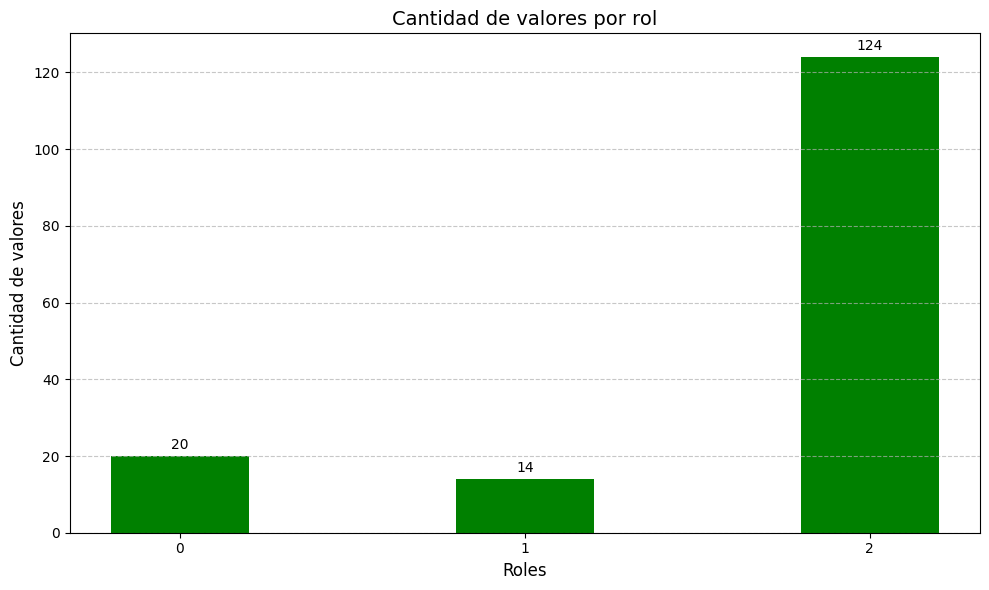

In [ ]:
eje_x = [len(rol_0), len(rol_1), len(rol_2)]
eje_y = [0, 1, 2]

plt.figure(figsize=(10, 6))
barras = plt.bar(range(3), eje_x, color='green', width=0.4)

plt.xticks(range(3), eje_y)

plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.xlabel('Roles', fontsize=12)
plt.ylabel('Cantidad de valores', fontsize=12)
plt.title('Cantidad de valores por rol', fontsize=14)

for bar in barras:
    height = bar.get_height()
    plt.annotate('{}'.format(height),
                 xy=(bar.get_x() + bar.get_width() / 2, height),
                 xytext=(0, 3),
                 textcoords="offset points",
                 ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()

In [ ]:
roles_dict = {}

for i in rol_0:
  roles_dict[i] = 0

for i in rol_1:
  roles_dict[i] = 1

for i in rol_2:
  roles_dict[i] = 2

In [ ]:
lugares = {}

lugares['(30.27, -97.74)'] = '221 East 9th Street'
lugares['(30.27, -97.75)'] = '709 West 6th Street'
lugares['(30.26, -97.74)'] = 'Red River Street'
lugares['(30.29, -97.75)'] = '2505 Longview Street'
lugares['(30.29, -97.74)'] = '2605 Whitis Avenue'
lugares['(30.28, -97.74)'] = '207 West 18th Street'
lugares['(30.25, -97.75)'] = 'West Gibson Street'
lugares['(30.26, -97.75)'] = '400 1/2 South 1st Street'
lugares['(30.27, -97.73)'] = '1155 Curve Street'
lugares['(30.26, -97.76)'] = '1402 Hillmont Street'
lugares['(30.26, -97.73)'] = '1403 East 2nd Street'
lugares['(30.2, -97.67)'] = '3600 Presidential Boulevard'
lugares['(30.28, -97.75)'] = 'West 15th Street'
lugares['(30.26, -97.72)'] = '2023 East 5th Street'
lugares['(30.27, -97.76)'] = 'Reserve Road'
lugares['(30.24, -97.72)'] = '1400 South Pleasant Valley Road'
lugares['(30.25, -97.76)'] = '1702 Briar Street'
lugares['(30.3, -97.74)'] = '3304 Guadalupe Street'
lugares['(30.24, -97.73)'] = '1500 Royal Crest Drive'
lugares['(30.28, -97.76)'] = '1629 West 11 1/2 Street'
lugares['(30.25, -97.73)'] = 'Nash Hernandez Sr Road'
lugares['(30.29, -97.73)'] = '2908 Beanna Street'
lugares['(30.32, -97.71)'] = '909 East Koenig Lane'
lugares['(30.29, -97.72)'] = '3301 Hollywood Avenue'
lugares['(30.28, -97.73)'] = 'East 20th Street'
lugares['(30.28, -97.77)'] = '2106 West 7th Street'
lugares['(30.4, -97.72)'] = '11405 Alterra Parkway'
lugares['(30.24, -97.75)'] = '313 Lone Oak Drive'
lugares['(30.26, -97.77)'] = '2002 Dexter Street'
lugares['(30.25, -97.74)'] = '811 East Riverside Drive'
lugares['(30.25, -97.77)'] = '2008 Kinney Avenue'
lugares['(30.28, -97.72)'] = '1915 East Martin Luther King Jr Boulevard'
lugares['(30.23, -97.76)'] = '3001 South Congress Avenue'
lugares['(30.27, -97.77)'] = 'Lady Bird Lake Hike and Bike Trail'
lugares['(30.24, -97.76)'] = 'Gillis District Park Trail'
lugares['(30.24, -97.78)'] = '1911 Lightsey Road'
lugares['(30.24, -97.74)'] = '1903 Fairlawn Lane'
lugares['(30.31, -97.73)'] = '4504 Avenue C'
lugares['(30.23, -97.77)'] = '3707 South 2nd Street'
lugares['(30.3, -97.72)'] = '1000 East 41st Street'
lugares['(30.32, -97.73)'] = '5209 North Lamar Boulevard'
lugares['(30.23, -97.73)'] = '2400 East Oltorf Street'
lugares['(30.24, -97.79)'] = 'Barley Bean, South Lamar Boulevard'
lugares['(30.27, -97.72)'] = '1157 Salina Street'
lugares['(30.21, -97.75)'] = '4368 Freidrich Lane'
lugares['(30.31, -97.72)'] = '611 Fairfield Lane'
lugares['(30.23, -97.74)'] = '2500 Candlewood Court'
lugares['(30.24, -97.71)'] = 'Riverside Golf Course, 1020 Grove Boulevard'
lugares['(30.31, -97.74)'] = '4200 North Lamar Boulevard'
lugares['(30.25, -97.78)'] = '2207 De Verne Street'
lugares['(30.3, -97.73)'] = '3811 Avenue H'
lugares['(30.23, -97.72)'] = '2241 Cromwell Circle'
lugares['(30.25, -97.72)'] = 'Ann & Roy Butler Hike and Bike Trail'
lugares['(30.3, -97.78)'] = '3708 Meredith Street'
lugares['(30.26, -97.79)'] = '2904 Barton Skyway'
lugares['(30.19, -97.67)'] = '4015 Bergstrom Drive'
lugares['(30.19, -97.77)'] = 'East William Cannon Drive'
lugares['(30.2, -97.66)'] = '3600 Presidential Boulevard'
lugares['(30.2, -97.77)'] = '490 Little Texas Lane'
lugares['(30.2, -97.84)'] = '8405 Hornet Drive'
lugares['(30.21, -97.67)'] = '3018 Spirit of Texas Drive'
lugares['(30.21, -97.76)'] = '4707 Weidemar Lane'
lugares['(30.21, -97.77)'] = '5001 Wasson Road'
lugares['(30.21, -97.78)'] = '510 Gate Tree Lane'
lugares['(30.21, -97.79)'] = '5701 Mojave Drive'
lugares['(30.22, -97.69)'] = 'Cambria Hotel Austin Airport, Discovery Lane'
lugares['(30.22, -97.72)'] = '5305 East Oltorf Street'
lugares['(30.22, -97.73)'] = 'Country Club Creek Trail'
lugares['(30.22, -97.74)'] = '3400 Catalina Drive'
lugares['(30.22, -97.75)'] = 'South Interstate 35'
lugares['(30.22, -97.76)'] = '405 East Ben White Boulevard'
lugares['(30.22, -97.77)'] = '400 West Saint Elmo Road'
lugares['(30.22, -97.78)'] = '4608 Mount Vernon Drive'
lugares['(30.22, -97.8)'] = '2212 Village Way Drive'
lugares['(30.23, -97.71)'] = '5606 Penick Drive'
lugares['(30.23, -97.75)'] = 'St. Edwards University, 3001 South Congress Avenue'
lugares['(30.23, -97.78)'] = '1517 Summer Stone Drive'
lugares['(30.23, -97.79)'] = 'Popeyes, Cactus Lane'
lugares['(30.23, -97.8)'] = '2624 Western Trails Boulevard'
lugares['(30.23, -97.82)'] = '2624 Western Trails Boulevard'
lugares['(30.23, -97.83)'] = '5700 South Mopac Expressway'
lugares['(30.23, -97.84)'] = '4701 Monterey Oaks Boulevard'
lugares['(30.24, -97.77)'] = '1104 Flanagan Cove'
lugares['(30.24, -97.82)'] = 'South Mopac Service Road'
lugares['(30.25, -97.7)'] = '5005 Red Bluff Road'
lugares['(30.25, -97.71)'] = 'Ann & Roy Hike & Bike Trail'
lugares['(30.25, -97.79)'] = '2404 Kathy Cove'
lugares['(30.25, -97.8)'] = '2901 Via Fortuna'
lugares['(30.26, -97.7)'] = '842 Springdale Road'
lugares['(30.26, -97.71)'] = '2793 East 7th Street'
lugares['(30.26, -97.78)'] = '2609 Deerfoot Trail'
lugares['(30.26, -97.8)'] = '1928 Holly Hill Drive'
lugares['(30.26, -97.81)'] = '2517 Walsh Tarlton Lane'
lugares['(30.27, -97.7)'] = '3201 Kay Street'
lugares['(30.27, -97.71)'] = 'Yellow Jacket Stadium, Hargrave Street'
lugares['(30.27, -97.78)'] = 'Arnulfo Alonso Way'
lugares['(30.27, -97.79)'] = 'Trader Joes, 2805 Bee Caves Road'
lugares['(30.27, -97.8)'] = '3126 Honey Tree Lane'
lugares['(30.28, -97.69)'] = '1304 Cometa Street'
lugares['(30.28, -97.7)'] = '3309 East 17th Street'
lugares['(30.28, -97.71)'] = 'Platform Apartments - Building 3, 2823 East Martin Luther King Jr Boulevard'
lugares['(30.28, -97.78)'] = '2702 Valley Spring Road'
lugares['(30.29, -97.7)'] = '2800 Tom Miller Street'
lugares['(30.29, -97.71)'] = '1731 East 38½ Street'
lugares['(30.29, -97.76)'] = '2305 Newfield Lane'
lugares['(30.29, -97.77)'] = '2507 Bridle Path'
lugares['(30.29, -97.78)'] = 'Lions Municipal Golf Course, 2901 Enfield Road'
lugares['(30.3, -97.7)'] = '2203 Philomena Street'
lugares['(30.3, -97.71)'] = '4501 Rowood Road'
lugares['(30.3, -97.75)'] = '1204 West 29th Street'
lugares['(30.3, -97.76)'] = '41 Margranita Crescent'
lugares['(30.3, -97.77)'] = '2907 Townes Lane'
lugares['(30.3, -97.83)'] = 'Hotel Granduca Pool, Capital Ridge Driveway'
lugares['(30.31, -97.69)'] = '2003 Northridge Drive'
lugares['(30.31, -97.7)'] = '1419 Corona Drive'
lugares['(30.31, -97.71)'] = '948 East 50th Street'
lugares['(30.31, -97.75)'] = '3819 Jefferson Street'
lugares['(30.31, -97.77)'] = '3005 Scenic Drive'
lugares['(30.32, -97.68)'] = '2204 Vanderbilt Lane'
lugares['(30.32, -97.7)'] = '1106 Clayton Lane'
lugares['(30.32, -97.72)'] = '106 East 55th Street'
lugares['(30.32, -97.74)'] = '2117 West 49th Street'
lugares['(30.32, -97.75)'] = '2600 La Ronde Street'
lugares['(30.32, -97.76)'] = '4501 Fairview Drive'
lugares['(30.32, -97.77)'] = '3405 Westledge Circle'
lugares['(30.33, -97.7)'] = '7100 Carver Avenue'
lugares['(30.33, -97.71)'] = 'St. Francis School, Twin Crest Drive'
lugares['(30.33, -97.72)'] = '600 Hammack Drive'
lugares['(30.33, -97.73)'] = 'The Pearl, 1301 West Koenig Lane'
lugares['(30.33, -97.74)'] = '2106 Shoalmont Drive'
lugares['(30.34, -97.7)'] = 'North Interstate 35'
lugares['(30.34, -97.71)'] = '7511 Meadowview Lane'
lugares['(30.34, -97.72)'] = '7088 Easy Wind Drive'
lugares['(30.34, -97.74)'] = '2108 White Horse Trail'
lugares['(30.34, -97.76)'] = '3567 Ranch to Market Road 2222'
lugares['(30.35, -97.69)'] = '919 Park Plaza'
lugares['(30.35, -97.7)'] = '110 Oertli Lane'
lugares['(30.35, -97.72)'] = '7804 Tisdale Drive'
lugares['(30.35, -97.73)'] = '7516 Hardy Drive'
lugares['(30.35, -97.75)'] = 'North Mopac Service Road'
lugares['(30.35, -97.76)'] = '6210 Shadow Valley Drive'
lugares['(30.36, -97.73)'] = 'Infiniti, Burnet Road'
lugares['(30.36, -97.74)'] = '3001 West Anderson Lane'
lugares['(30.36, -97.75)'] = '7600 Wood Hollow Drive'
lugares['(30.37, -97.73)'] = '8608 Primrose Lane'
lugares['(30.38, -97.74)'] = 'DoubleTree by Hilton Hotel Austin Northwest Arboretum, 8901 Business Park Drive'
lugares['(30.39, -97.74)'] = 'Panera Bread, North Capital of Texas Highway'
lugares['(30.39, -97.75)'] = 'Arboretum Boulevard'
lugares['(30.4, -97.71)'] = '11700 Stonehollow Drive'
lugares['(30.4, -97.73)'] = 'North Mopac Service Road'
lugares['(30.4, -97.74)'] = 'Life Time, 4210 West Braker Lane'
lugares['(30.4, -97.75)'] = 'Great Hills Park & Ride, OChester Boulevard'
lugares['(30.41, -97.7)'] = '2015 Cedar Bend Drive'
lugares['(30.41, -97.71)'] = '12111 Northern Walnut Creek Trail'
lugares['(30.41, -97.72)'] = '3501 Duval Road'
lugares['(30.43, -97.74)'] = 'Riata Trace Parkway'
lugares['(30.14, -97.64)'] = 'Circuit of The Americas, Swiss Drive'
lugares['(30.21, -97.66)'] = '9669 New Airport Drive'
lugares['(30.21, -97.81)'] = '2508 Aldford Drive'
lugares['(30.22, -97.84)'] = 'Shops at Arbor Trail'
lugares['(30.29, -97.86)'] = 'Omni Barton Creek Resort, 8108 Barton Club Drives'

In [ ]:
coordenadas_por_direccion = {}

for clave, valor in lugares.items():
  coordenadas_por_direccion[valor] = clave

In [ ]:
df_particiones = pd.DataFrame(roles_dict.items(), columns=['location', 'rol'])
df_coordenadas_por_direccion = pd.DataFrame(coordenadas_por_direccion.items(), columns=['location', 'coordenadas'])

merged = df_particiones.merge(df_coordenadas_por_direccion, on='location', how='left')

merged['latitud'] = merged['coordenadas'].apply(lambda coord: float(coord.split(',')[0].strip('()')))
merged['longitud'] = merged['coordenadas'].apply(lambda coord: float(coord.split(',')[1].strip('()')))

color_map = {0: 'red', 1: 'blue', 2: 'yellow'}
merged['rol'] = merged['rol'].replace(color_map)

columnas_deseadas = ['latitud', 'longitud', 'rol']
merged_previo = merged[columnas_deseadas]

df_final = merged_previo.rename(columns={'rol': 'color'})

In [ ]:
import plotly.express as px

colores_zonas = ['#4B00B4', '#C30000', '#DBCE01']


fig = px.scatter_mapbox(df_final,
                        lon= df_final['longitud'],
                        lat= df_final['latitud'],
                        zoom = 8,
                        color = df_final['color'],
                        width = 1500,
                        height = 1200,
                        color_discrete_sequence=colores_zonas
                        )

fig.update_layout(mapbox_style="carto-positron")
fig.update_layout(margin={"r":0, "t":20, "l":0, "b":5})
fig.show()